<a href="https://colab.research.google.com/github/fabianrl007/cyclistic-case-study/blob/main/The_Anatomy_of_a_Win.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Setup: Importing Libraries

Importing necessary Python libraries for data manipulation (Pandas, NumPy) and visualization (Matplotlib, Seaborn).

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Data Access: Mounting Google Drive

Mounting Google Drive to access the dataset file stored there. This step requires user authentication.


In [2]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


## 3. Data Loading

Loading the `boxing_matches.csv` dataset from the specified file path into a Pandas DataFrame (`df`). Displaying the first few rows and the shape to confirm successful loading.

In [3]:
# Define file path and load the dataset
# --- Remember to replace with your actual file path ---
file_path = '/content/drive/MyDrive/Colab Notebooks/boxing_matches.csv'
try:
    df = pd.read_csv(file_path)
    print(f"Dataset loaded successfully. Shape: {df.shape}")
    print("First 5 rows:")
    display(df.head())
except Exception as e:
    print(f"Error loading dataset: {e}")
    df = None # Ensure df is None if loading fails


Dataset loaded successfully. Shape: (387427, 26)
First 5 rows:


,age_A,age_B,height_A,height_B,reach_A,reach_B,stance_A,stance_B,weight_A,weight_B,...,kos_A,kos_B,result,decision,judge1_A,judge1_B,judge2_A,judge2_B,judge3_A,judge3_B
0,35.0,27.0,179.0,175.0,178.0,179.0,orthodox,orthodox,160.0,160.0,...,33,34.0,draw,SD,110.0,118.0,115.0,113.0,114.0,114.0
1,26.0,31.0,175.0,185.0,179.0,185.0,orthodox,orthodox,164.0,164.0,...,34,32.0,win_A,UD,120.0,108.0,120.0,108.0,120.0,108.0
2,28.0,26.0,176.0,175.0,NaN,179.0,orthodox,orthodox,154.0,154.0,...,13,33.0,win_B,KO,NaN,NaN,NaN,NaN,NaN,NaN
3,25.0,29.0,175.0,174.0,179.0,180.0,orthodox,orthodox,155.0,155.0,...,32,19.0,win_A,KO,47.0,48.0,49.0,46.0,48.0,47.0
4,25.0,35.0,175.0,170.0,179.0,170.0,orthodox,orthodox,155.0,NaN,...,32,33.0,win_A,UD,118.0,110.0,119.0,109.0,117.0,111.0


## 4. Initial Data Exploration

Performing initial exploration to understand the dataset's structure. This includes checking the shape (rows, columns), data types of each column (`.info()`), summary statistics for numerical columns (`.describe()`), missing value counts (`.isnull().sum()`), and the distribution of key categorical features (`.value_counts()`). This helps identify potential data quality issues like outliers or missing information.

In [4]:
# Basic exploration (only if df loaded successfully)
if df is not None:
    print("--- Data Info ---")
    df.info() # Check data types and non-null counts

    print("\n--- Initial Descriptive Statistics (Numerical) ---")
    display(df.describe()) # Get summary stats for numerical columns

    print("\n--- Missing Value Counts (Snapshot) ---")
    print(df.isnull().sum()) # Check missing values per column

    print("\n--- Value Counts for Key Categorical Columns ---")
    print("\nDecision Types:\n", df['decision'].value_counts())
    print("\nResult Types:\n", df['result'].value_counts())
    # Only print stance counts if column exists and stance analysis is planned
    if 'stance_A' in df.columns:
         print("\nStance_A Counts:\n", df['stance_A'].value_counts())

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387427 entries, 0 to 387426
Data columns (total 26 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   age_A     352888 non-null  float64
 1   age_B     257935 non-null  float64
 2   height_A  249246 non-null  float64
 3   height_B  134640 non-null  float64
 4   reach_A   112342 non-null  float64
 5   reach_B   37873 non-null   float64
 6   stance_A  231009 non-null  object 
 7   stance_B  231009 non-null  object 
 8   weight_A  135573 non-null  float64
 9   weight_B  130358 non-null  float64
 10  won_A     387427 non-null  int64  
 11  won_B     387427 non-null  int64  
 12  lost_A    387427 non-null  int64  
 13  lost_B    387427 non-null  int64  
 14  drawn_A   387427 non-null  int64  
 15  drawn_B   387427 non-null  int64  
 16  kos_A     387427 non-null  int64  
 17  kos_B     387348 non-null  float64
 18  result    387427 non-null  object 
 19  decision  387427 non-null 

,age_A,age_B,height_A,height_B,reach_A,reach_B,weight_A,weight_B,won_A,won_B,...,drawn_A,drawn_B,kos_A,kos_B,judge1_A,judge1_B,judge2_A,judge2_B,judge3_A,judge3_B
count,352888.000000,257935.000000,249246.000000,134640.000000,112342.000000,37873.000000,135573.000000,130358.000000,387427.000000,387427.000000,...,387427.000000,387427.000000,387427.000000,387348.000000,52248.000000,52060.000000,70371.000000,70032.000000,61231.000000,61023.000000
mean,24.416041,26.583345,172.786657,172.882657,178.848605,179.001030,146.340636,147.089484,23.108438,15.159080,...,2.826481,2.636375,10.338887,6.234735,62.778901,59.509700,59.560941,56.570411,60.784276,57.995215
std,6.523590,11.823224,9.130127,9.430631,12.002404,14.867537,30.240142,30.624890,27.629901,19.938137,...,5.584610,5.027003,12.392049,8.750690,30.337580,29.285058,31.021367,30.260935,31.910461,31.170590
min,-74.000000,-74.000000,2.000000,15.000000,5.000000,1.000000,10.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,21.000000,23.000000,166.000000,167.000000,170.000000,171.000000,125.000000,126.000000,5.000000,2.000000,...,0.000000,0.000000,2.000000,0.000000,39.000000,37.000000,39.000000,36.000000,39.000000,36.000000
50%,24.000000,26.000000,173.000000,173.000000,178.000000,178.000000,140.000000,140.000000,14.000000,8.000000,...,1.000000,1.000000,6.000000,3.000000,59.000000,54.000000,58.000000,54.000000,58.000000,54.000000
75%,27.000000,30.000000,178.000000,179.000000,185.000000,185.000000,160.000000,160.000000,31.000000,21.000000,...,3.000000,3.000000,14.000000,9.000000,80.000000,79.000000,80.000000,75.000000,80.000000,78.000000
max,1818.000000,2016.000000,255.000000,255.000000,456.000000,456.000000,363.000000,450.000000,332.000000,251.000000,...,77.000000,76.000000,131.000000,128.000000,540.000000,291.000000,299.000000,294.000000,300.000000,295.000000



--- Missing Value Counts (Snapshot) ---
age_A        34539
age_B       129492
height_A    138181
height_B    252787
reach_A     275085
reach_B     349554
stance_A    156418
stance_B    156418
weight_A    251854
weight_B    257069
won_A            0
won_B            0
lost_A           0
lost_B           0
drawn_A          0
drawn_B          0
kos_A            0
kos_B           79
result           0
decision         0
judge1_A    335179
judge1_B    335367
judge2_A    317056
judge2_B    317395
judge3_A    326196
judge3_B    326404
dtype: int64

--- Value Counts for Key Categorical Columns ---

Decision Types:
 decision
PTS    108070
TKO     89709
KO      70940
UD      62290
NWS     19369
SD      11323
MD       9364
RTD      9065
DQ       4831
TD       2466
Name: count, dtype: int64

Result Types:
 result
win_A    321661
win_B     40994
draw      24772
Name: count, dtype: int64

Stance_A Counts:
 stance_A
orthodox    190232
southpaw     40777
Name: count, dtype: int64


## 5. Data Cleaning

Addressing potential data quality issues identified during exploration.

### 5.1 Handling Outliers
Applying capping to physical attribute columns (age, height, weight, reach) to constrain values within realistic ranges (e.g., age 16-50). This prevents extreme or erroneous values from unduly skewing subsequent analysis. Missing values (NaNs) are preserved during this process.

In [5]:
# Handle outliers by capping values in specified columns
if df is not None:
    columns_to_cap = {
        'age_A': (16, 50), 'age_B': (16, 50),
        'height_A': (150, 210), 'height_B': (150, 210),
        'weight_A': (100, 250), 'weight_B': (100, 250),
        'reach_A': (150, 220), 'reach_B': (150, 220)
    }
    print("Applying capping to handle outliers...")
    for column, (min_val, max_val) in columns_to_cap.items():
        if column in df.columns: # Check if column exists
             # Preserve NaNs while capping
             df[column] = df[column].clip(lower=min_val, upper=max_val)
    print("Outlier capping complete.")

    # Optional: Display describe() again to see effect of capping
    print("\n--- Descriptive Statistics After Capping (Snapshot) ---")
    display(df[['age_A', 'height_A', 'weight_A', 'reach_A']].describe())

Applying capping to handle outliers...
Outlier capping complete.

--- Descriptive Statistics After Capping (Snapshot) ---


,age_A,height_A,weight_A,reach_A
count,352888.000000,249246.000000,135573.000000,112342.000000
mean,24.413667,172.805040,146.233490,178.891999
std,4.899291,8.934495,29.741952,11.216685
min,16.000000,150.000000,100.000000,150.000000
25%,21.000000,166.000000,125.000000,170.000000
50%,24.000000,173.000000,140.000000,178.000000
75%,27.000000,178.000000,160.000000,185.000000
max,50.000000,210.000000,250.000000,220.000000


## 6. Feature Engineering: Weight Classes

Creating a new categorical feature, `weight_class`, based on standard professional boxing divisions. This column is derived from the cleaned `weight_A` data using defined bins and labels, allowing for analysis across different weight categories.

In [6]:
# Create weight classes based on cleaned weight_A
if df is not None and 'weight_A' in df.columns:
    weight_bins = [0, 105, 108, 112, 115, 118, 122, 126, 130, 135, 140, 147, 154, 160, 168, 175, 200, 300]
    weight_labels = ['Minimumweight', 'Light Flyweight', 'Flyweight', 'Super Flyweight', 'Bantamweight',
                     'Super Bantamweight', 'Featherweight', 'Super Featherweight', 'Lightweight',
                     'Super Lightweight', 'Welterweight', 'Super Welterweight', 'Middleweight',
                     'Super Middleweight', 'Light Heavyweight', 'Cruiserweight', 'Heavyweight']

    # Use cleaned weight_A; handle potential NaNs in weight_A if necessary for classification logic
    df['weight_class'] = pd.cut(df['weight_A'], bins=weight_bins, labels=weight_labels, right=False)
    print("Created 'weight_class' column based on 'weight_A'.")
    print("\nWeight Class Distribution:")
    print(df['weight_class'].value_counts())

Created 'weight_class' column based on 'weight_A'.

Weight Class Distribution:
weight_class
Welterweight           13083
Super Lightweight      12294
Super Welterweight     11519
Lightweight            10771
Cruiserweight          10627
Super Featherweight     9974
Super Middleweight      9766
Heavyweight             8979
Middleweight            8852
Super Bantamweight      8364
Featherweight           7976
Light Heavyweight       5737
Super Flyweight         5261
Bantamweight            4880
Flyweight               4276
Light Flyweight         2650
Minimumweight            564
Name: count, dtype: int64


## 7. Analysis

Performing focused analysis to answer the key project questions.

### 7.1 Win Methods vs. Weight Class
Analyzing the frequency distribution of different fight outcomes (`decision` column). This includes calculating the overall frequency of each decision type and, more importantly, the percentage distribution of decision types within each created `weight_class`.

In [7]:
# Analyze win methods overall and by weight class
if df is not None and 'decision' in df.columns and 'weight_class' in df.columns:
    print("--- Overall Win Method Frequencies ---")
    print(df['decision'].value_counts())

    print("\n--- Win Method Percentage Distribution by Weight Class ---")
    # Use observed=False if you want to include categories with 0 counts
    win_method_by_weight_pct = (df.groupby('weight_class', observed=False)['decision']
                                .value_counts(normalize=True).unstack().fillna(0) * 100)
    display(win_method_by_weight_pct) # Displaying the percentages table

--- Overall Win Method Frequencies ---
decision
PTS    108070
TKO     89709
KO      70940
UD      62290
NWS     19369
SD      11323
MD       9364
RTD      9065
DQ       4831
TD       2466
Name: count, dtype: int64

--- Win Method Percentage Distribution by Weight Class ---


decision,DQ,KO,MD,NWS,PTS,RTD,SD,TD,TKO,UD
weight_class,,,,,,,,,,
Minimumweight,1.595745,14.361702,7.978723,0.709220,17.198582,1.773050,4.432624,1.241135,24.822695,25.886525
Light Flyweight,0.566038,14.339623,8.150943,0.188679,7.698113,2.264151,6.943396,4.490566,25.849057,29.509434
Flyweight,0.631431,15.855940,5.238541,0.350795,14.499532,2.151543,5.168382,2.455566,27.221703,26.426567
Super Flyweight,0.855351,17.373123,4.295761,0.874358,17.544193,2.147881,5.132104,1.748717,25.660521,24.367991
Bantamweight,0.758197,18.463115,3.340164,2.192623,18.524590,2.336066,5.020492,1.946721,26.577869,20.840164
Super Bantamweight,0.824964,17.419895,3.287901,2.474892,21.257771,2.259684,4.495457,1.315160,25.789096,20.875179
Featherweight,0.977934,16.261284,3.410231,2.419759,21.464393,2.532598,3.849047,1.053159,26.404213,21.627382
Super Featherweight,0.982555,17.004211,3.108081,1.824744,23.811911,2.346100,4.050531,0.912372,25.817125,20.142370
Lightweight,0.946987,16.330888,2.970940,2.887383,23.730387,2.209637,3.546560,0.881998,26.534212,19.961006


### 7.2 Stance vs. Outcome

Investigating the relationship between fighter stance (`stance_A`) and the fight result (`result`). This analysis specifically filters out rows where `stance_A` is unknown before calculating the outcome distribution (percentage of Win A, Win B, Draw) for Orthodox vs. Southpaw fighters.

In [8]:
# Analyze outcome distribution based on stance_A (revised method)
if df is not None and 'stance_A' in df.columns and 'result' in df.columns:
    # Filter out rows where stance_A is missing for this specific analysis
    df_stance = df.dropna(subset=['stance_A'])
    print(f"Analyzing stance based on {len(df_stance)} rows with known stance_A info.")

    print("\n--- Outcome Distribution (%) by Stance_A ---")
    # Calculate win rate for Fighter A based on their stance
    outcome_dist_by_stance = (df_stance.groupby('stance_A')['result']
                              .value_counts(normalize=True).unstack().fillna(0) * 100)
    display(outcome_dist_by_stance) # Shows % of Win_A, Win_B, Draw for each stance

Analyzing stance based on 231009 rows with known stance_A info.

--- Outcome Distribution (%) by Stance_A ---


result,draw,win_A,win_B
stance_A,,,
orthodox,4.747361,86.777198,8.475441
southpaw,4.193540,88.809868,6.996591


### 7.3 Age vs. Outcome

Analyzing the relationship between the age of Fighter A (`age_A`) and the fight result. This involves comparing the average age of Fighter A across different outcomes (Win A, Win B, Draw) and preparing the cleaned age data for visualization to compare distributions.

In [9]:
# Analyze average age based on outcome
if df is not None and 'result' in df.columns and 'age_A' in df.columns:
    print("--- Average Age_A by Outcome ---")
    avg_age_by_outcome = df.groupby('result')['age_A'].mean()
    display(avg_age_by_outcome)

    # Isolate age data for visualization (ensure NaNs are handled if necessary by visualization function)
    age_data_win_A = df.loc[df['result'] == 'win_A', 'age_A']
    age_data_win_B = df.loc[df['result'] == 'win_B', 'age_A'] # Note: Still using Age_A when B wins
    print("\nAge data prepared for visualization.")

--- Average Age_A by Outcome ---


,age_A
result,
draw,23.928485
win_A,24.303740
win_B,25.615634



Age data prepared for visualization.


### 7.4 Location Data Check

Verifying whether location information is present in the dataset columns, as this was identified as a potential area of interest but suspected to be missing.

In [10]:
# Check if location data exists
if df is not None:
    location_column_exists = False
    if 'location' in df.columns:
        location_column_exists = True
    # Optional: More robust check for case-insensitivity if needed
    # else:
    #    location_column_exists = any(col.lower() == 'location' for col in df.columns)

    print(f"Location column exists: {location_column_exists}")
    if not location_column_exists:
        print("Skipping location-based analysis and visualization.")

Location column exists: False
Skipping location-based analysis and visualization.


## 8. Visualizations

Generating plots to visually represent the key findings from the analysis.

### 8.1 Win Methods by Weight Class
Creating a heatmap to effectively visualize the percentage distribution of various win methods across all defined weight classes. This helps illustrate the trends identified in the analysis.

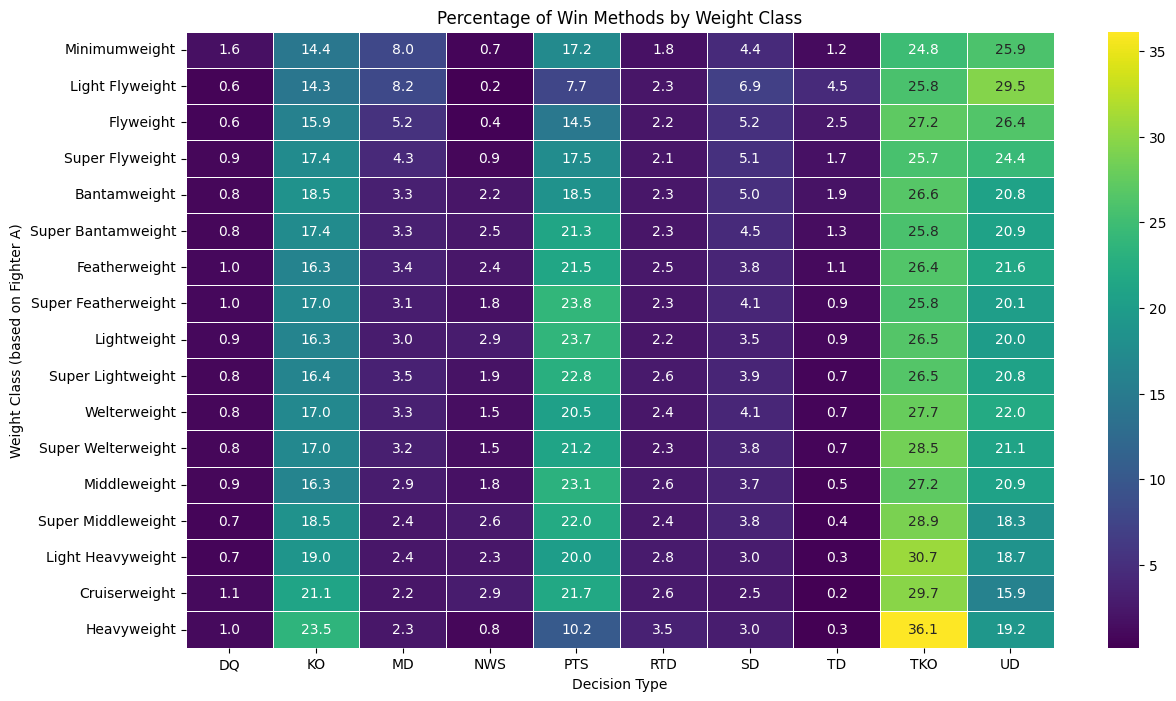

In [11]:
# Visualize win methods by weight class using a heatmap
if df is not None and 'win_method_by_weight_pct' in locals(): # Check if the analysis was run
    plt.figure(figsize=(14, 8)) # Adjusted size
    sns.heatmap(win_method_by_weight_pct, annot=True, fmt=".1f", cmap="viridis", linewidths=.5) # Added linewidth
    plt.title('Percentage of Win Methods by Weight Class')
    plt.xlabel('Decision Type')
    plt.ylabel('Weight Class (based on Fighter A)')
    plt.yticks(rotation=0) # Ensure y-axis labels are horizontal
    plt.show()

### 8.2 Stance Outcome Distribution

Generating a grouped bar chart to visually compare the calculated outcome distributions (Win A, Win B, Draw percentages) for Fighter A based on their stance (Orthodox vs. Southpaw).

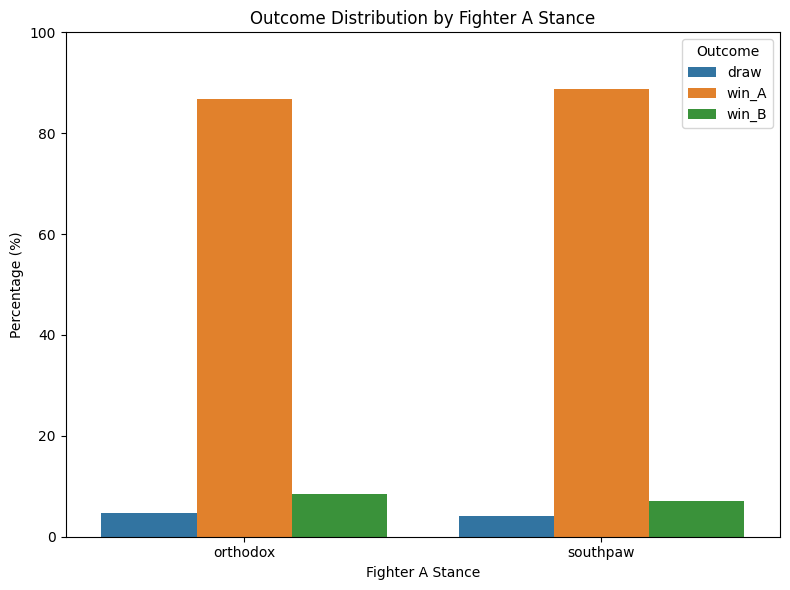

In [12]:
# Visualize outcome distribution by stance (revised)
if df is not None and 'outcome_dist_by_stance' in locals(): # Check if analysis was run
    # Prepare data for seaborn barplot with hue
    outcome_df_vis = outcome_dist_by_stance.reset_index().melt(id_vars='stance_A', var_name='Outcome', value_name='Percentage')

    plt.figure(figsize=(8, 6)) # Adjusted size
    sns.barplot(x='stance_A', y='Percentage', hue='Outcome', data=outcome_df_vis)
    plt.title('Outcome Distribution by Fighter A Stance')
    plt.xlabel('Fighter A Stance')
    plt.ylabel('Percentage (%)')
    plt.ylim(0, 100)
    plt.legend(title='Outcome')
    plt.tight_layout()
    plt.show()

### 8.3 Age Distribution (Winners vs. Losers)

Creating overlapping Kernel Density Estimate (KDE) plots to visualize and compare the age distribution of Fighter A for fights they won (`result == 'win_A'`) versus fights they lost (`result == 'win_B'`).

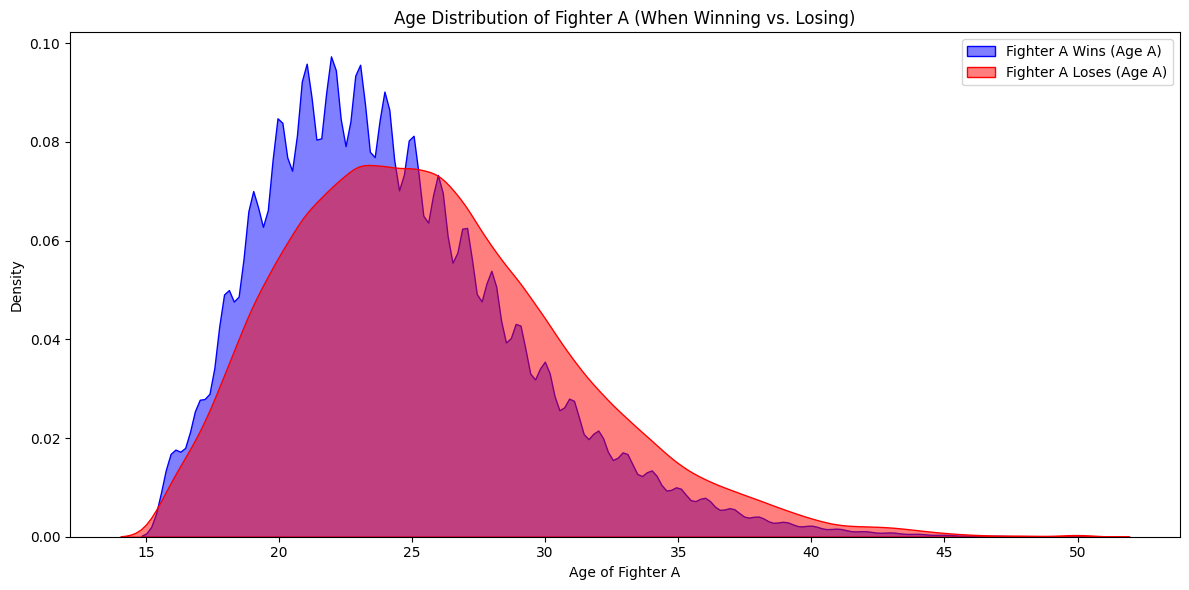

In [13]:
# Visualize age distribution for winners vs losers (using Fighter A age)
if df is not None and 'age_data_win_A' in locals() and 'age_data_win_B' in locals(): # Check if data exists
    plt.figure(figsize=(12, 6)) # Adjusted size
    # Plotting KDE only might be cleaner than overlapping histograms if frequencies differ a lot
    sns.kdeplot(age_data_win_A.dropna(), color='blue', label='Fighter A Wins (Age A)', fill=True, alpha=0.5)
    sns.kdeplot(age_data_win_B.dropna(), color='red', label='Fighter A Loses (Age A)', fill=True, alpha=0.5)
    # Or use histplot:
    # sns.histplot(age_data_win_A.dropna(), color='blue', label='Fighter A Wins (Age A)', kde=True, alpha=0.5, stat="density", common_norm=False)
    # sns.histplot(age_data_win_B.dropna(), color='red', label='Fighter A Loses (Age A)', kde=True, alpha=0.5, stat="density", common_norm=False)

    plt.title('Age Distribution of Fighter A (When Winning vs. Losing)')
    plt.xlabel('Age of Fighter A')
    plt.ylabel('Density') # Changed from Frequency if using KDE or density histogram
    plt.legend()
    plt.tight_layout()
    plt.show()

## 9. Summary of Notebook Findings

This notebook performed an exploratory data analysis on the `boxing_matches.csv` dataset after essential cleaning steps. Key findings from the code execution include:

* **Win Methods & Weight:** A clear trend was observed where heavier weight classes showed higher percentages of stoppages (e.g., Heavyweight TKOs approx. 36%, KOs approx. 24%), while lighter and middle classes relied more on decisions (e.g., UD, PTS).
* **Stance & Outcome:** After filtering for known stances, the outcome distribution (Win A, Win B, Draw) was remarkably similar for Fighter A whether their stance was Orthodox (approx. 87% Win A) or Southpaw (approx. 89% Win A). This suggests little impact based on stance in this view, likely heavily influenced by the dataset's skew towards 'Win_A' results.
* **Age & Outcome:** Fighter A tended to be slightly younger when winning (average age ~24.3 years) compared to when losing (average age ~25.6 years when Fighter B wins). The primary age range observed for Fighter A was the early-to-mid 20s.
* **Data Limitations:** Location data was confirmed absent, preventing geographical analysis. Significant missing data was noted for stance and physical attributes, requiring specific handling (filtering) for some analyses. Outliers were addressed via capping.